# Cartopy Example

#### This example plots severe wind and hail reports from 1994 to 2023 across the Midwestern United States taken from the Storm Prediction Center archive: https://www.spc.noaa.gov/wcm/

First order of business was to import libraries related to cartopy as well as pandas for reading in the SPC data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

A function was created to plot cartopy features on map all at once

In [2]:
def plot_background(ax):
    ax.gridlines(zorder = 0)
    ax.add_feature(cf.LAND, edgecolor = 'black', facecolor = '#ffffff', alpha = 1)
    ax.add_feature(cf.COASTLINE, edgecolor = 'black')
    ax.add_feature(cf.BORDERS, edgecolor = 'black', linewidth = 1.3)
    ax.add_feature(cf.STATES, edgecolor = 'black', linewidth = 0.7)
    ax.add_feature(cf.LAKES, edgecolor = 'black', linewidth = 1, facecolor = 'none')
    ax.add_feature(cf.OCEAN, facecolor = 'none')

Using pandas, the csv file with SPC data was read in a separated between wind and hail reports

In [3]:
# Read in combined wind and hail csv file that is already filtered by state and time
reports = pd.read_csv("1994_2023_reports_filtered.csv")

# Separate wind and hail reports for separate plotting 
wind_reports = reports[(reports['report_type'] == 'wind')]
hail_reports = reports[(reports['report_type'] == 'hail')]

The latitude and longitude data was then taken from each report type to be able to be plotted

In [4]:
wind_lats = wind_reports.latitude
wind_lons = wind_reports.longitude
hail_lats = hail_reports.latitude
hail_lons = hail_reports.longitude

Finally, plotting of the SPC data using cartopy and matplotlib occurs, producing the desired visualization

Text(0.5, 1.0, 'SPC Severe Wind and Hail Reports (1994-2023)')

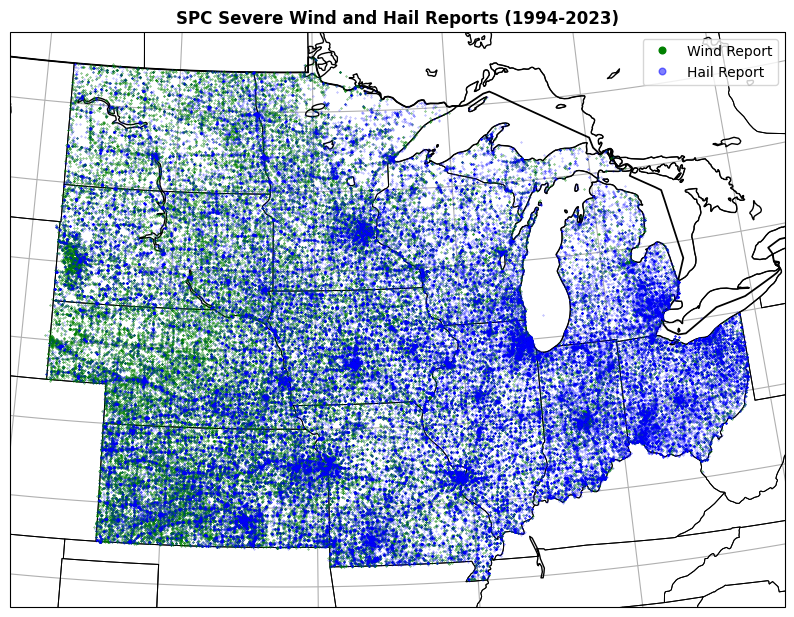

In [5]:
# Create matplotlib figure and set plot projection
plt.figure(figsize = (10,8), facecolor = 'white', edgecolor = 'black')
ax = plt.axes(projection=ccrs.LambertConformal())

# Plot wind wind and hail coordinates on map
ax.plot(hail_lons, hail_lats, 'go', markersize = 0.3, alpha = 1, transform=ccrs.PlateCarree())
ax.plot(wind_lons, wind_lats, 'bo', markersize = 0.3, alpha = 0.5, transform=ccrs.PlateCarree())

# Plot background cartopy features using function development in second code cell
plot_background(ax)

# Plot map legend and set title
ax.legend(["Wind Report", "Hail Report"], loc="upper right", markerscale=16)
ax.set_title('SPC Severe Wind and Hail Reports (1994-2023)', fontsize = 12, fontweight = 'bold')